In [1]:
import torch
import numpy as np
from transformers import AutoModelForMaskedLM, AutoTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

c:\Users\aylin\anaconda3\envs\CSNLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Step 1: Load the Pre-trained Model and Tokenizer
MODEL_PATH = '../logs/3l4h_displace_len_5_range_64/trained'
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForMaskedLM.from_pretrained(MODEL_PATH)

In [3]:
# Step 2: Extract Token Embeddings
def get_embeddings(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs, output_hidden_states=True)
    # Get the logits
    embeddings = outputs.hidden_states[-1].detach().numpy()
    embeddings_flat = embeddings.reshape(-1, embeddings.shape[-1])
    return embeddings_flat[1:-1]


In [5]:
# Step 3: Prepare Data for Classifier
# Assuming you have a list of tokens and their corresponding labels

# A string with all tokens we want to classify
list_numbers = [str(i) for i in range(64)]
string = ' '.join(list_numbers)

# Compute the embeddings
embeddings = get_embeddings(string, tokenizer, model)

# Compute the labels
inputs = tokenizer(string, return_tensors='pt')
labels = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])[1:-1]


print(embeddings.shape)
assert embeddings.shape[0] == len(labels)
print(embeddings[0])

(64, 768)
[-0.00927613 -0.6953016  -1.1199028  -0.01721477  0.76891637  1.3969549
 -0.6737553   0.2480952   1.0904214   0.8483483  -1.7571114   1.0397781
 -0.2718051  -0.3654083  -1.2307485  -0.41153887 -0.23381807  1.1506035
  0.4524215  -0.26343966  0.6375554   0.38904873 -0.80340344 -0.82764757
 -1.6705581  -1.217543    1.3067163   0.12857229 -2.2473423  -0.45313597
  1.1025001   0.03709546  1.3183507   0.61967164  0.26496735 -0.4139051
  1.0496929  -0.39637005  0.5427013  -1.4865693   1.9773602  -0.16353491
  0.8333831  -0.35495803 -0.32096037  0.4657801   0.1233184   0.19959742
  0.3408572   0.32456088  0.03796467  0.11571503  0.90280896  0.30789042
 -0.4802336   0.28261623 -0.30390012 -0.1231994   1.4679909   0.32130405
  0.09546445  0.4288505  -1.2322251   0.13435921  0.4481872   0.064859
 -0.6677911  -1.1913497   1.2158964   0.43764547 -1.620461    0.36743543
  0.9117014  -0.57194895 -0.7158282  -0.6717688   0.5919649   0.19778764
  1.7602904  -1.0568542   1.4820576  -0.5233900

In [35]:
# Step 4: Train the Linear Classifier
X_train, X_val, y_train, y_val = train_test_split(embeddings, labels, test_size=0.2, random_state=42)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
# Step 5: Evaluate the Classifier
y_pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Convert to numerics
y_val = [int(i) for i in y_val]
y_pred = [int(i) for i in y_pred]

mse = mean_squared_error(y_pred, y_val)
mae = mean_absolute_error(y_pred, y_val)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Mean Squared Error: 3.923076923076923
Mean Absolute Error: 1.7692307692307692
Validation Accuracy: 0.00%


c:\Users\aylin\anaconda3\envs\CSNLP\lib\site-packages\sklearn\metrics\_classification.py:226: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


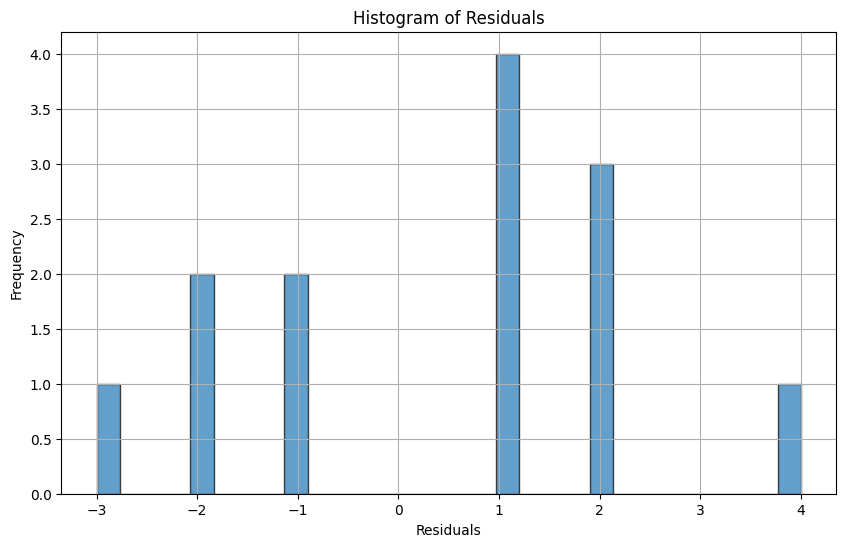

In [39]:
# Compute Residuals
residuals = np.array(y_pred) - np.array(y_val)

# Plot Residuals Histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

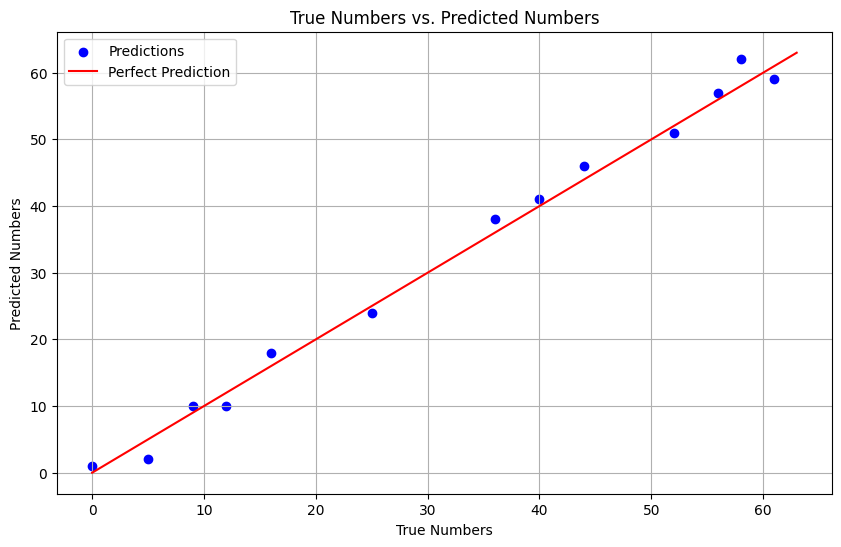

In [40]:
# Initialize lists to store true numbers and their predicted values
true_numbers = []
predicted_numbers = []

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predictions')
plt.plot(range(64), range(64), color='red', label='Perfect Prediction')
plt.xlabel('True Numbers')
plt.ylabel('Predicted Numbers')
plt.title('True Numbers vs. Predicted Numbers')
plt.legend()
plt.grid(True)
plt.show()

(341, 768)
Mean Squared Error: 10253.231884057972
Mean Absolute Error: 77.4927536231884
Validation Accuracy: 0.00%


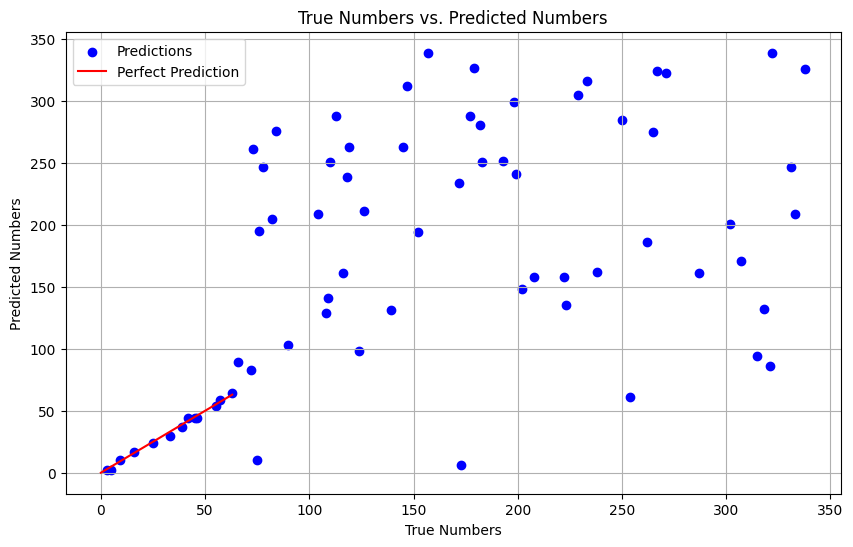

In [41]:
# Step 3: Prepare Data for Classifier
# Assuming you have a list of tokens and their corresponding labels

# A string with all tokens we want to classify
list_numbers = [str(i) for i in range(341)]
string = ' '.join(list_numbers)

# Compute the embeddings
embeddings = get_embeddings(string, tokenizer, model)

# Compute the labels
inputs = tokenizer(string, return_tensors='pt')
labels = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])[1:-1]


print(embeddings.shape)
assert embeddings.shape[0] == len(labels)

# Step 4: Train the Linear Classifier
X_train, X_val, y_train, y_val = train_test_split(embeddings, labels, test_size=0.2, random_state=42)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Step 5: Evaluate the Classifier
y_pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Convert to numerics
y_val = [int(i) for i in y_val]
y_pred = [int(i) for i in y_pred]

mse = mean_squared_error(y_pred, y_val)
mae = mean_absolute_error(y_pred, y_val)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Initialize lists to store true numbers and their predicted values
true_numbers = []
predicted_numbers = []

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predictions')
plt.plot(range(64), range(64), color='red', label='Perfect Prediction')
plt.xlabel('True Numbers')
plt.ylabel('Predicted Numbers')
plt.title('True Numbers vs. Predicted Numbers')
plt.legend()
plt.grid(True)
plt.show()